In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
from citipy import citipy

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

trairi br
vicuna cl
jiujiang cn
hobart au
san cristobal ec
mataura pf
rikitea pf
cape town za
tsentralnyy ru
nishihara jp
severo-kurilsk ru
beringovskiy ru
east london za
souillac mu
carnarvon au
dingle ie
tecoanapa mx
batangafo cf
souillac mu
maneadero mx
castro cl
denpasar id
clyde river ca
mataura pf
norman wells ca
vasylivka ua
tazovskiy ru
lang son vn
rikitea pf
abnub eg
port hardy ca
longyearbyen sj
jamestown sh
bonthe sl
nizhneyansk ru
illoqqortoormiut gl
kahului us
mataura pf
illoqqortoormiut gl
bolonchen mx
bosobolo cd
jamestown sh
moose factory ca
lebu cl
kenai us
albany au
mount isa au
coahuayana mx
nikolskoye ru
sao filipe cv
georgetown sh
venado tuerto ar
tuktoyaktuk ca
bluff nz
rikitea pf
punta arenas cl
narsaq gl
thompson ca
busselton au
san patricio mx
rikitea pf
te anau nz
port hardy ca
sawtell au
avarua ck
finschhafen pg
nueve de julio ar
busselton au
puerto ayora ec
kahului us
fethiye tr
belushya guba ru
emba kz
kudahuvadhoo mv
marystown ca
ulaangom mn
ribeira grande

oksfjord no
kavaratti in
port alfred za
attawapiskat ca
hasaki jp
esperance au
belushya guba ru
pevek ru
puerto el triunfo sv
altagracia de orituco ve
marawi sd
bengkulu id
ondorhaan mn
hermanus za
yellowknife ca
geraldton au
lota cl
khatanga ru
governador valadares br
dandong cn
lasa cn
sedelnikovo ru
batemans bay au
hunza pk
tuktoyaktuk ca
imeni poliny osipenko ru
jamestown sh
qaanaaq gl
butaritari ki
igrim ru
jamestown sh
kavieng pg
fortuna us
hobart au
taolanaro mg
kapaa us
dikson ru
rodrigues alves br
ponta do sol cv
tumannyy ru
northam au
atuona pf
port alfred za
kaitangata nz
rikitea pf
kotovo ru
halalo wf
kapaa us
upernavik gl
ribeira grande pt
arraial do cabo br
albany au
havelock us
antequera py
coahuayana mx
kapaa us
sitka us
poum nc
exu br
tshikapa cd
hilo us
klaksvik fo
puerto ayora ec
hobart au
belushya guba ru
cururupu br
tual id
taolanaro mg
jalu ly
cabo san lucas mx
rikitea pf
puerto ayora ec
kapaa us
hay river ca
punta arenas cl
necochea ar
port elizabeth za
puerto ay

In [17]:
from citipy import citipy

In [18]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | trairi
Processing Record 2 of Set 1 | vicuna
Processing Record 3 of Set 1 | jiujiang
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | san cristobal
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | tsentralnyy
City not found. Skipping...
Processing Record 10 of Set 1 | nishihara
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | beringovskiy
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | dingle
Processing Record 17 of Set 1 | tecoanapa
Processing Record 18 of Set 1 | batangafo
Processing Record 19 of Set 1 | maneadero
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | denpasar
Processing Record 22 of Set 1 | clyde river
P

Processing Record 38 of Set 4 | marsabit
Processing Record 39 of Set 4 | alekseyevsk
Processing Record 40 of Set 4 | charlestown
Processing Record 41 of Set 4 | mahebourg
Processing Record 42 of Set 4 | khotyn
Processing Record 43 of Set 4 | menongue
Processing Record 44 of Set 4 | vila velha
Processing Record 45 of Set 4 | leh
Processing Record 46 of Set 4 | camabatela
Processing Record 47 of Set 4 | marsa matruh
Processing Record 48 of Set 4 | nabire
Processing Record 49 of Set 4 | acajutla
Processing Record 50 of Set 4 | novyye burasy
Processing Record 1 of Set 5 | yeniseysk
Processing Record 2 of Set 5 | imbituba
Processing Record 3 of Set 5 | shingu
Processing Record 4 of Set 5 | phan thiet
Processing Record 5 of Set 5 | areosa
Processing Record 6 of Set 5 | mackay
Processing Record 7 of Set 5 | machico
Processing Record 8 of Set 5 | arecibo
Processing Record 9 of Set 5 | new norfolk
Processing Record 10 of Set 5 | lianzhou
Processing Record 11 of Set 5 | tiksi
Processing Record 1

Processing Record 28 of Set 8 | antofagasta
Processing Record 29 of Set 8 | oksfjord
Processing Record 30 of Set 8 | hasaki
Processing Record 31 of Set 8 | esperance
Processing Record 32 of Set 8 | puerto el triunfo
Processing Record 33 of Set 8 | altagracia de orituco
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | lota
Processing Record 36 of Set 8 | governador valadares
Processing Record 37 of Set 8 | dandong
Processing Record 38 of Set 8 | lasa
Processing Record 39 of Set 8 | sedelnikovo
City not found. Skipping...
Processing Record 40 of Set 8 | batemans bay
Processing Record 41 of Set 8 | hunza
City not found. Skipping...
Processing Record 42 of Set 8 | imeni poliny osipenko
Processing Record 43 of Set 8 | igrim
Processing Record 44 of Set 8 | fortuna
Processing Record 45 of Set 8 | rodrigues alves
Processing Record 46 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 8 | northam
Processing Record 48 of Set 8 | kotovo
Processing Re

Processing Record 16 of Set 12 | anar darreh
City not found. Skipping...
Processing Record 17 of Set 12 | arroyo
Processing Record 18 of Set 12 | hobyo
Processing Record 19 of Set 12 | kilis
Processing Record 20 of Set 12 | itaqui
Processing Record 21 of Set 12 | west wendover
Processing Record 22 of Set 12 | gimli
Processing Record 23 of Set 12 | shache
Processing Record 24 of Set 12 | takab
Processing Record 25 of Set 12 | moba
Processing Record 26 of Set 12 | radhanpur
Processing Record 27 of Set 12 | chernyshevskiy
Processing Record 28 of Set 12 | chatellerault
Processing Record 29 of Set 12 | flin flon
Processing Record 30 of Set 12 | altamira
Processing Record 31 of Set 12 | zunyi
Processing Record 32 of Set 12 | berlevag
Processing Record 33 of Set 12 | bowen
Processing Record 34 of Set 12 | esil
Processing Record 35 of Set 12 | lagdo
Processing Record 36 of Set 12 | muros
Processing Record 37 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 38 of

In [22]:
len(city_data)

578

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Trairi,-3.2778,-39.2689,80.13,77,8,8.57,BR,2022-07-01 20:01:00
1,Vicuna,-30.0319,-70.7081,63.77,34,70,5.91,CL,2022-07-01 20:04:45
2,Jiujiang,29.7333,115.9833,79.99,82,83,4.07,CN,2022-07-01 20:04:45
3,Hobart,-42.8794,147.3294,40.86,90,87,11.50,AU,2022-07-01 20:04:45
4,San Cristobal,7.7669,-72.2250,78.98,60,49,5.53,VE,2022-07-01 20:04:46
5,Mataura,-46.1927,168.8643,42.48,97,89,3.31,NZ,2022-07-01 20:04:46
6,Rikitea,-23.1203,-134.9692,71.55,75,69,13.35,PF,2022-07-01 20:04:46
7,Cape Town,-33.9258,18.4232,66.34,64,2,5.99,ZA,2022-07-01 20:04:47
8,Nishihara,26.1842,127.7558,79.88,89,75,9.22,JP,2022-07-01 20:04:47
9,Severo-Kurilsk,50.6789,156.1250,51.93,78,84,11.68,RU,2022-07-01 20:04:47


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Trairi,BR,2022-07-01 20:01:00,-3.2778,-39.2689,80.13,77,8,8.57
1,Vicuna,CL,2022-07-01 20:04:45,-30.0319,-70.7081,63.77,34,70,5.91
2,Jiujiang,CN,2022-07-01 20:04:45,29.7333,115.9833,79.99,82,83,4.07
3,Hobart,AU,2022-07-01 20:04:45,-42.8794,147.3294,40.86,90,87,11.50
4,San Cristobal,VE,2022-07-01 20:04:46,7.7669,-72.2250,78.98,60,49,5.53
5,Mataura,NZ,2022-07-01 20:04:46,-46.1927,168.8643,42.48,97,89,3.31
6,Rikitea,PF,2022-07-01 20:04:46,-23.1203,-134.9692,71.55,75,69,13.35
7,Cape Town,ZA,2022-07-01 20:04:47,-33.9258,18.4232,66.34,64,2,5.99
8,Nishihara,JP,2022-07-01 20:04:47,26.1842,127.7558,79.88,89,75,9.22
9,Severo-Kurilsk,RU,2022-07-01 20:04:47,50.6789,156.1250,51.93,78,84,11.68


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

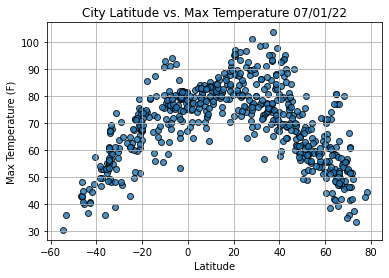

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

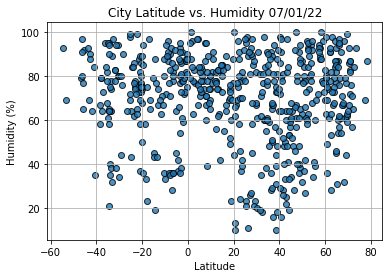

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

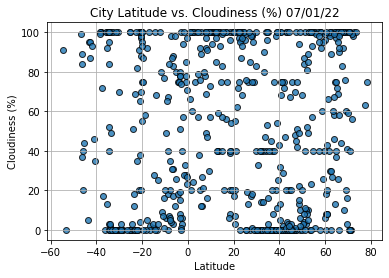

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

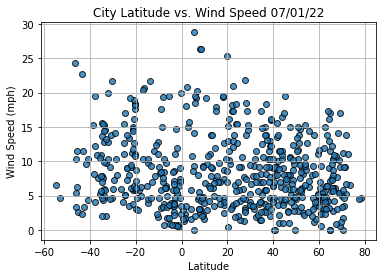

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Jiujiang,CN,2022-07-01 20:04:45,29.7333,115.9833,79.99,82,83,4.07
4,San Cristobal,VE,2022-07-01 20:04:46,7.7669,-72.2250,78.98,60,49,5.53
8,Nishihara,JP,2022-07-01 20:04:47,26.1842,127.7558,79.88,89,75,9.22
9,Severo-Kurilsk,RU,2022-07-01 20:04:47,50.6789,156.1250,51.93,78,84,11.68
10,Beringovskiy,RU,2022-07-01 20:01:24,63.0500,179.3167,43.88,98,100,6.40
...,...,...,...,...,...,...,...,...,...
573,Bilecik,TR,2022-07-01 20:19:53,40.0000,30.1667,66.85,74,0,4.05
574,Mirnyy,RU,2022-07-01 20:19:53,62.5353,113.9611,60.24,63,30,4.00
575,Inverness,GB,2022-07-01 20:19:54,57.4791,-4.2240,57.79,91,40,3.00
576,Bulancak,TR,2022-07-01 20:19:54,40.9372,38.2291,69.62,78,75,0.00


In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Jiujiang,CN,2022-07-01 20:04:45,29.7333,115.9833,79.99,82,83,4.07
4,San Cristobal,VE,2022-07-01 20:04:46,7.7669,-72.2250,78.98,60,49,5.53
8,Nishihara,JP,2022-07-01 20:04:47,26.1842,127.7558,79.88,89,75,9.22
9,Severo-Kurilsk,RU,2022-07-01 20:04:47,50.6789,156.1250,51.93,78,84,11.68
10,Beringovskiy,RU,2022-07-01 20:01:24,63.0500,179.3167,43.88,98,100,6.40


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

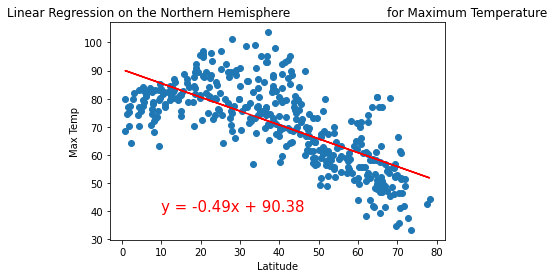

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

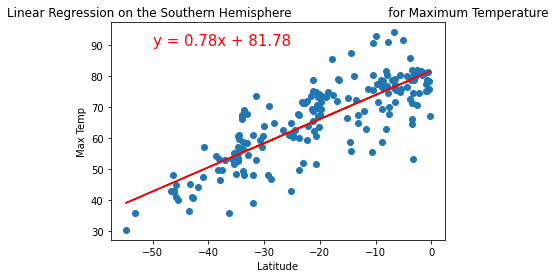

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

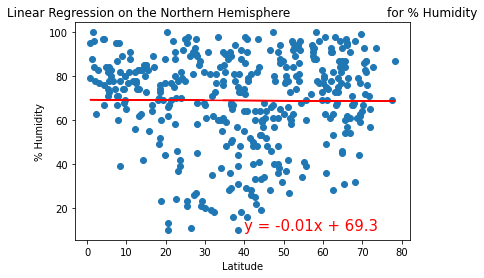

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

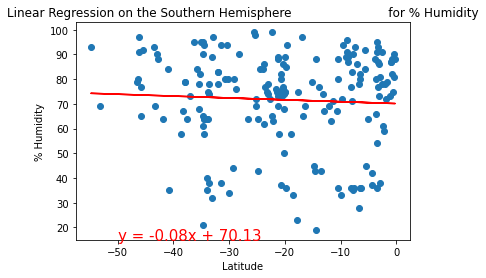

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

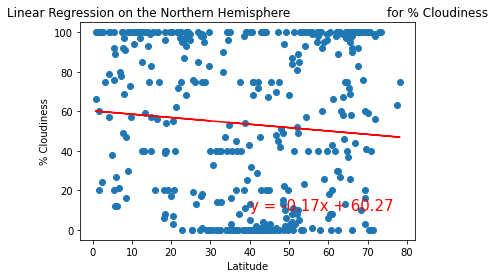

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

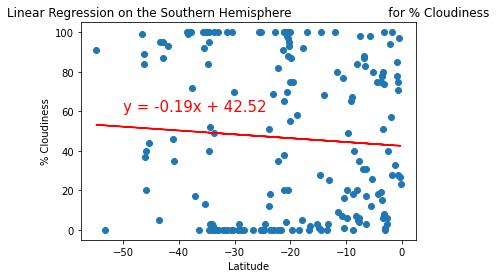

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

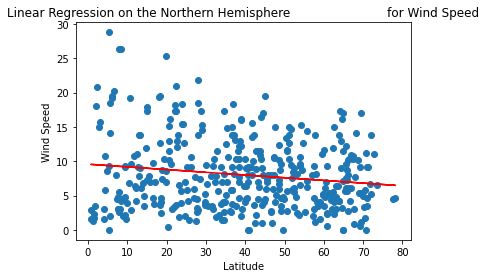

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


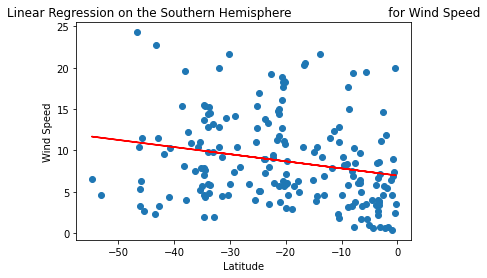

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [45]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [46]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Trairi,BR,2022-07-01 20:01:00,-3.2778,-39.2689,80.13,77,8,8.57
2,Jiujiang,CN,2022-07-01 20:04:45,29.7333,115.9833,79.99,82,83,4.07
4,San Cristobal,VE,2022-07-01 20:04:46,7.7669,-72.2250,78.98,60,49,5.53
8,Nishihara,JP,2022-07-01 20:04:47,26.1842,127.7558,79.88,89,75,9.22
14,Dingle,PH,2022-07-01 20:04:48,10.9995,122.6711,76.98,91,100,2.89
15,Tecoanapa,MX,2022-07-01 20:04:49,16.5167,-98.7500,87.06,64,56,9.71
17,Maneadero,MX,2022-07-01 20:04:49,31.7167,-116.5667,77.11,71,14,3.00
19,Denpasar,ID,2022-07-01 20:01:53,-8.6500,115.2167,78.46,89,40,14.97
21,Norman Wells,CA,2022-07-01 20:04:51,65.2820,-126.8329,77.05,31,72,5.64
25,Abnub,EG,2022-07-01 20:04:52,27.2696,31.1511,87.75,26,0,7.65


In [52]:
preferred_cities_df.count()

City          198
Country       198
Date          198
Lat           198
Lng           198
Max Temp      198
Humidity      198
Cloudiness    198
Wind Speed    198
dtype: int64

In [53]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Trairi,BR,80.13,-3.2778,-39.2689,
2,Jiujiang,CN,79.99,29.7333,115.9833,
4,San Cristobal,VE,78.98,7.7669,-72.2250,
8,Nishihara,JP,79.88,26.1842,127.7558,
14,Dingle,PH,76.98,10.9995,122.6711,
15,Tecoanapa,MX,87.06,16.5167,-98.7500,
17,Maneadero,MX,77.11,31.7167,-116.5667,
19,Denpasar,ID,78.46,-8.6500,115.2167,
21,Norman Wells,CA,77.05,65.2820,-126.8329,
25,Abnub,EG,87.75,27.2696,31.1511,
